# **IRIS FLOWER CLASSIFICATION MODEL FINAL FOR DATASET**

✅ Dataset Loaded Successfully!

Columns in dataset: Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')
✅ Target column 'species' encoded!

✅ Model Accuracy: 1.0000

📌 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


📌 Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


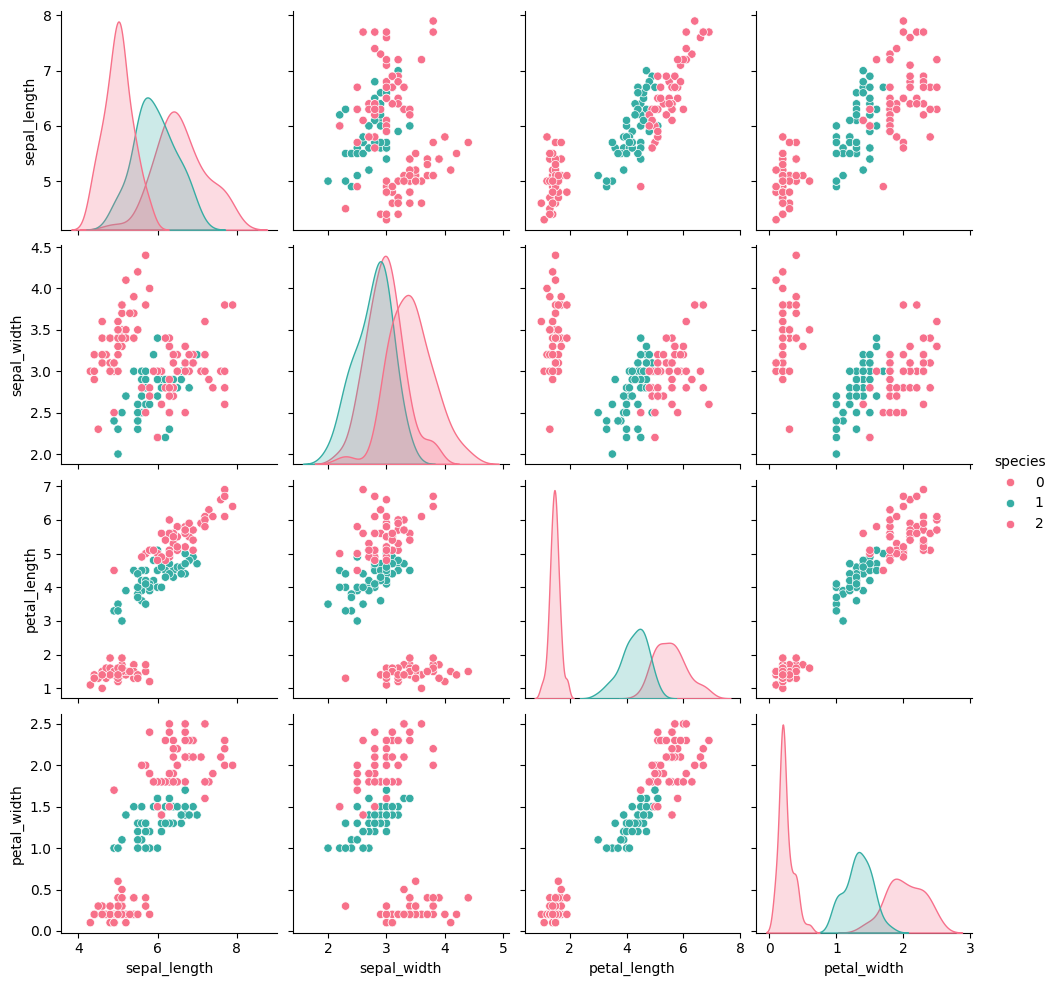

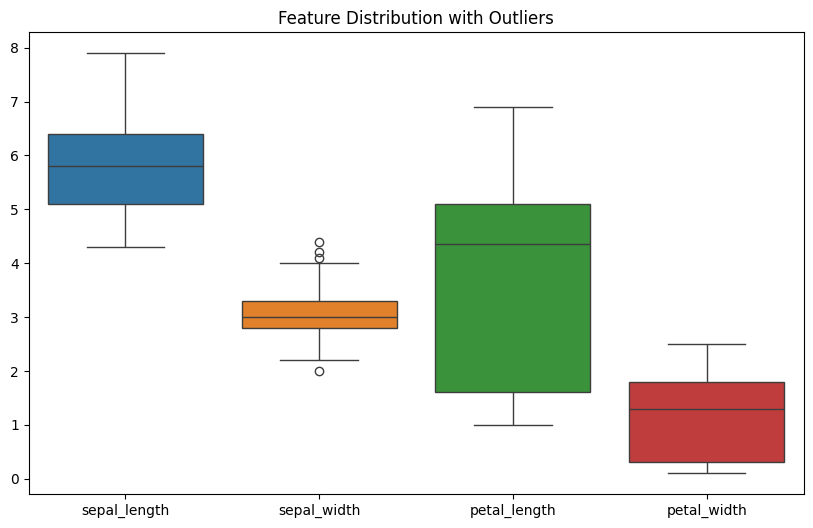

<ipython-input-9-8b42af4b16e1>:83: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances['Feature'], y=feature_importances['Importance'], palette='viridis')


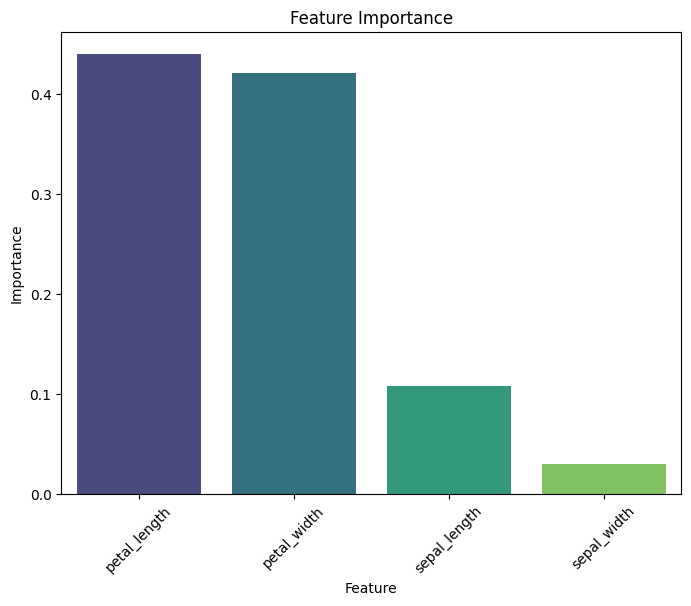

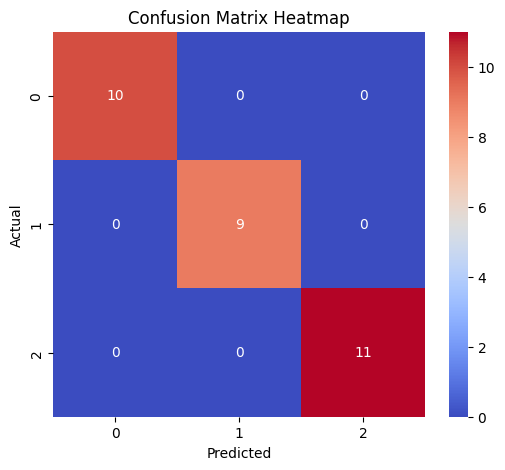


✅ Model & Preprocessing Files Saved Successfully!


In [9]:
import zipfile
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib

# 📌 **Step 1: Extract Dataset from ZIP**
zip_path = "/content/archive (7).zip"  # Update the path if needed
extract_path = "/content/iris_dataset"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# 📌 **Step 2: Load the CSV File**
csv_files = [f for f in os.listdir(extract_path) if f.endswith('.csv')]
if csv_files:
    file_path = os.path.join(extract_path, csv_files[0])  # Load first CSV found
    df = pd.read_csv(file_path)
    print("✅ Dataset Loaded Successfully!\n")
else:
    raise FileNotFoundError("No CSV files found in the extracted folder.")

# 📌 **Step 3: Data Preprocessing**
df.columns = df.columns.str.strip()  # Remove any unwanted spaces in column names
print("Columns in dataset:", df.columns)  # Debugging step

# Auto-detect target column (assume last column is target)
target_column_name = df.columns[-1]  # Last column is assumed to be the target (Species)

# Drop non-feature columns (like 'Id' if present)
df.drop(columns=['Id'], errors='ignore', inplace=True)

# Encode target labels if categorical
if df[target_column_name].dtype == 'O':  # If it's an object (string)
    label_encoder = LabelEncoder()
    df[target_column_name] = label_encoder.fit_transform(df[target_column_name])
    print(f"✅ Target column '{target_column_name}' encoded!")

# Define Features & Target
X = df.drop(columns=[target_column_name])  # Drop target column
y = df[target_column_name]  # Target variable

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 📌 **Step 4: Train-Test Split**
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 📌 **Step 5: Train Model**
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 📌 **Step 6: Evaluate Model**
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"\n✅ Model Accuracy: {accuracy:.4f}")
print("\n📌 Classification Report:\n", classification_report(y_test, y_pred))
print("\n📌 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# 📌 **Step 7: Feature Importance**
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': model.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# 🔹 **Step 8: Visualizations**
# ✅ **Pairplot**
sns.pairplot(df, hue=target_column_name, palette='husl')
plt.show()

# ✅ **Boxplot for Outliers**
plt.figure(figsize=(10, 6))
sns.boxplot(data=df.drop(columns=[target_column_name]))
plt.title("Feature Distribution with Outliers")
plt.show()

# ✅ **Feature Importance Bar Chart**
plt.figure(figsize=(8, 6))
sns.barplot(x=feature_importances['Feature'], y=feature_importances['Importance'], palette='viridis')
plt.xticks(rotation=45)
plt.title("Feature Importance")
plt.show()

# ✅ **Confusion Matrix Heatmap**
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='coolwarm', fmt='d',
            xticklabels=y.unique(), yticklabels=y.unique())
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Heatmap")
plt.show()

# 📌 **Step 9: Save Model & Preprocessing Steps**
joblib.dump(model, "iris_model.pkl")
joblib.dump(scaler, "iris_scaler.pkl")
joblib.dump(label_encoder, "iris_label_encoder.pkl")  # Save the label encoder

print("\n✅ Model & Preprocessing Files Saved Successfully!")
